In [1]:
# package imports
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#importing every dataset
# business=pd.read_csv("./yelp_business.csv")
# business_attributes=pd.read_csv("./yelp_business_attributes.csv")
# business_hours=pd.read_csv("./yelp_business_hours.csv")
# check_in=pd.read_csv("./yelp_checkin.csv")
reviews=pd.read_csv("./yelp_review.csv")
# tip=pd.read_csv("./yelp_tip.csv")
# user=pd.read_csv("./yelp_user.csv")
end_time=time.time()
print("Took",end_time-start_time,"s")

Took 50.89821147918701 s


In [3]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [4]:
reviews.tail()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
5261663,PoGSiNz1X5SUu0qEt-qM5w,mPjPyipaD0C_myqWqDipZg,Ngk84Ax1tXgpoJFEGxot3w,1,2011-11-21,"Bought groupon $39 for 4 months from groupon, ...",36,3,3
5261664,-CJNPrDWgIkorx4iEZJXIg,mPjPyipaD0C_myqWqDipZg,pOEL97ld-FJMKO8Ki8JmYg,3,2016-04-30,"Spring rolls was pretty good, cod was a bit ra...",0,0,0
5261665,W9eVvOcpBvG6lpJPoJOxuA,mPjPyipaD0C_myqWqDipZg,5ubokMNw8qfbX2WtxgJG1Q,4,2011-10-23,"Had a 8 dish set meal, was enough for 10 peopl...",3,0,1
5261666,hqQ1UTFKMN2P1ezUow48OQ,mPjPyipaD0C_myqWqDipZg,EO3i5kTUG7_S2OIQ23sdSA,3,2011-11-07,"A small, cozy family run Authentic korean rest...",2,0,0
5261667,ldsIs3sGXPJ7WM7VyAm4lQ,mPjPyipaD0C_myqWqDipZg,HloEEXm_QzEpycuwA_RtQA,3,2011-11-15,Really nice atmosphere and settings and very c...,0,1,1


In [5]:
reviews['date'] = pd.to_datetime(reviews.date)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           datetime64[ns]
text           object
useful         int64
funny          int64
cool           int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 361.3+ MB


In [6]:
review_count = reviews.groupby('date')['review_id'].count().reset_index(name='count')

In [7]:
review_count.head()

,date,count
0,2004-07-22,1
1,2004-09-15,1
2,2004-10-12,1
3,2004-10-19,7
4,2004-10-25,1


## Review Count per Day
1. increase over time
2. periodic in a year, and week
3. dip at thanksgiving and christmas

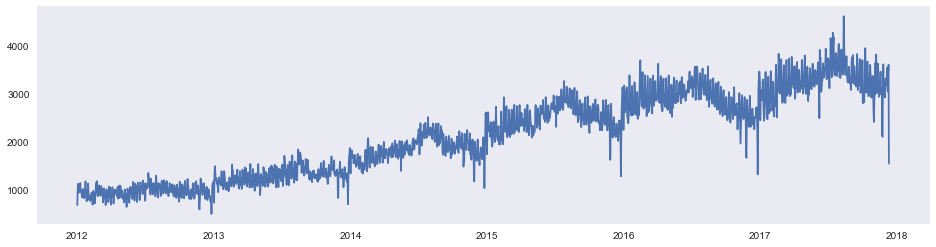

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = plt.plot('date', 'count', data = review_count[review_count['date']>='2012-01-01'])
plt.show()

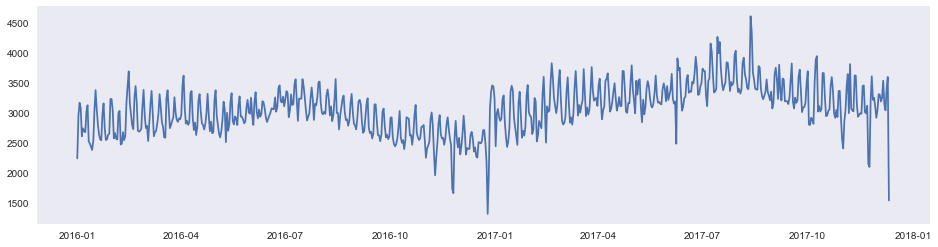

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = plt.plot('date', 'count', data = review_count[review_count['date']>='2016-01-01'])
plt.show()

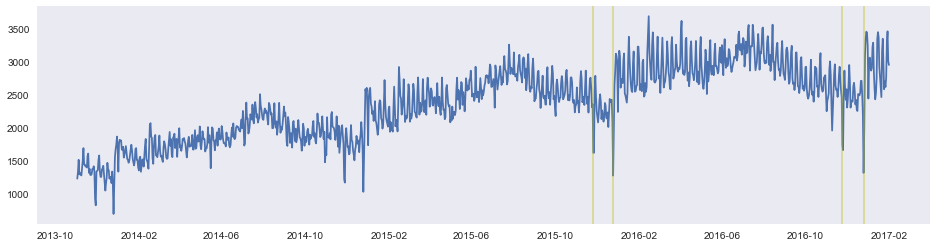

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = plt.plot('date', 'count', data = review_count[(review_count['date']>'2013-11-01') & (review_count['date']<'2017-02-01')])
plt.axvline(x='2015-11-26', color='y', alpha=0.4)
plt.axvline(x='2015-12-25', color='y', alpha=0.4)
# plt.axvline(x='2016-11-09', color='y')
plt.axvline(x='2016-11-24', color='y', alpha=0.4)
plt.axvline(x='2016-12-25', color='y', alpha=0.4)
plt.show()

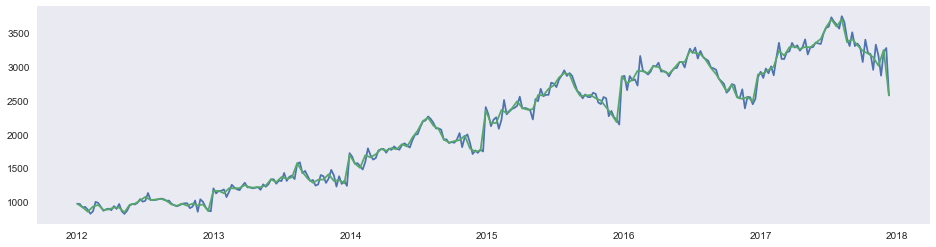

In [11]:
week_mean = review_count[review_count['date']>='2012-01-01'].set_index('date').resample('7D').reset_index()
week_2_mean = review_count[review_count['date']>='2012-01-01'].set_index('date').resample('14D').reset_index()

fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = plt.plot('date', 'count', data = week_mean)
ax = plt.plot('date', 'count', data = week_2_mean)
plt.show()

## FFT of total count
1. show weekly period
2. 2nd and 3rd harmonics of the fundamental frequency

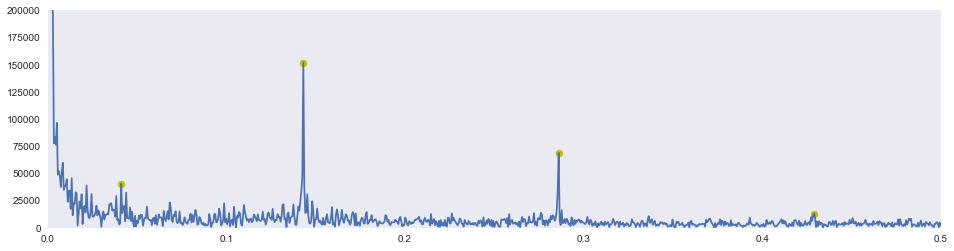

In [12]:
from scipy.fftpack import fft
from scipy import signal

y = review_count[review_count['date']>'2013-01-01']['count']
fmax = 0.5/1 # dx = 1 day
steps = len(y)
xf = np.linspace(-fmax, fmax, steps)
yf =np.fft.fftshift(np.abs(fft(y)))
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.set_xlim([0, fmax])
ax.set_ylim([0, 2e5])
ax = plt.plot(xf, yf)

index = signal.find_peaks_cwt(yf, np.arange(1, 2), min_snr=1.4, noise_perc=0.001)
index = np.concatenate([np.array([976]), index[:]])
ax = plt.scatter(xf[index], yf[index], color = 'y')
plt.show()

In [13]:
xf[976], xf[1160], xf[1418], xf[1676]

(0.04101995565410199,
 0.1430155210643016,
 0.2860310421286031,
 0.4290465631929047)

In [14]:
1/xf[976], 1/xf[1160], 1/xf[1418], 1/xf[1676]
## http://chadorzel.com/principles/2010/01/03/finding-patterns-in-data-fouri/

(24.37837837837838, 6.992248062015501, 3.4961240310077524, 2.330749354005168)

In [15]:
review_count['week'] = review_count['date'].dt.dayofweek
review_count.tail()

,date,count,week
4542,2017-12-07,3148,3
4543,2017-12-08,3044,4
4544,2017-12-09,3407,5
4545,2017-12-10,3602,6
4546,2017-12-11,1542,0


## Boxplot of total count by day
1. weekend tends to be high in average count
2. thursday has less review
3. Friday has low review count!!!

NameError: name 'sn' is not defined

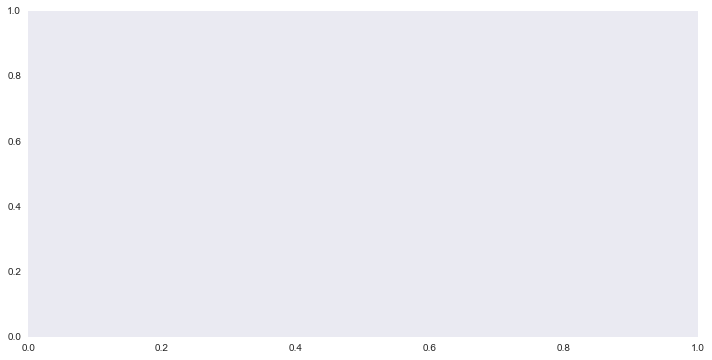

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax = sn.boxplot(y='week', x='count', data = review_count[review_count['date']>='2012-01-01'], orient='h')
plt.show()

## Total count group by stars
1. all ratings show similar pattern
2. 5 stars is getting more and more

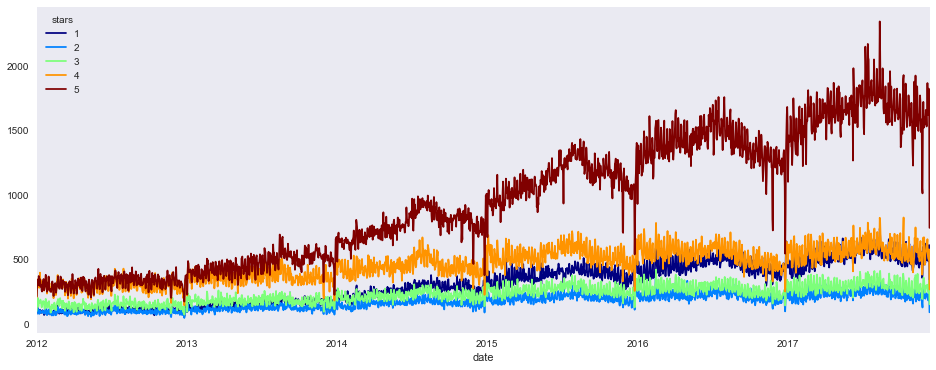

In [17]:
review_count_bystar = reviews.groupby(['date', 'stars'])['review_id'].count().reset_index(name='count')
review_count_bystar = review_count_bystar[review_count_bystar['date']>='2012-01-01']
review_count_bystar = review_count_bystar.pivot(index='date', columns='stars', values='count')
review_count_bystar.plot(figsize=(16, 6), colormap='jet')
plt.show()

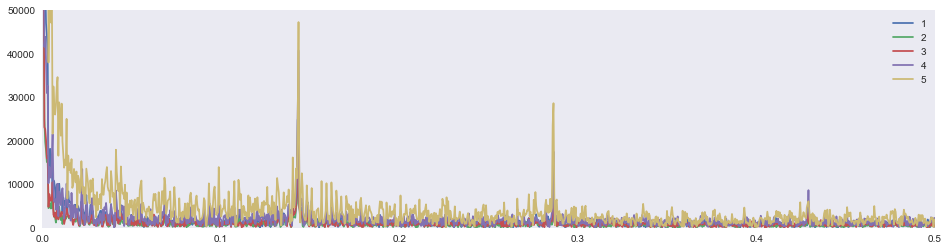

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax.set_xlim([0, fmax])
ax.set_ylim([0, 5e4])
for i in range(1,6):
    y = review_count_bystar[i]
    fmax = 0.5/1 # dx = 1 day
    steps = len(y)
    xf = np.linspace(-fmax, fmax, steps)
    yf =np.fft.fftshift(np.abs(fft(y)))
    ax = plt.plot(xf, yf, label=i)
    plt.legend()
plt.show()

## people getting more dipolar?

In [215]:
dipole = review_count_bystar.resample('3M').reset_index()
dipole.head()

stars,date,1,2,3,4,5
0,2012-01-31,94.774194,94.096774,156.806452,305.064516,301.741935
1,2012-04-30,96.300000,89.000000,142.155556,286.333333,295.933333
2,2012-07-31,110.956522,95.663043,147.608696,301.195652,326.717391
3,2012-10-31,111.967391,94.782609,148.554348,296.793478,338.858696
4,2013-01-31,113.532609,97.358696,154.326087,311.347826,345.271739


In [216]:
dipole[[1, 2, 3, 4, 5]] = dipole[[1, 2, 3, 4, 5]].divide(dipole[[1, 2, 3, 4, 5]].loc[0])
dipole = dipole.set_index('date')
dipole.tail()

stars,1,2,3,4,5
date,,,,,
2017-01-31,4.465305,2.126511,1.602987,1.603723,4.360658
2017-04-30,5.364495,2.467816,1.843466,1.827832,5.326935
2017-07-31,5.987458,2.681444,1.952074,1.951298,5.723794
2017-10-31,5.733995,2.538206,1.899115,1.890299,5.626353
2018-01-31,5.288565,2.258702,1.766042,1.801138,5.211851


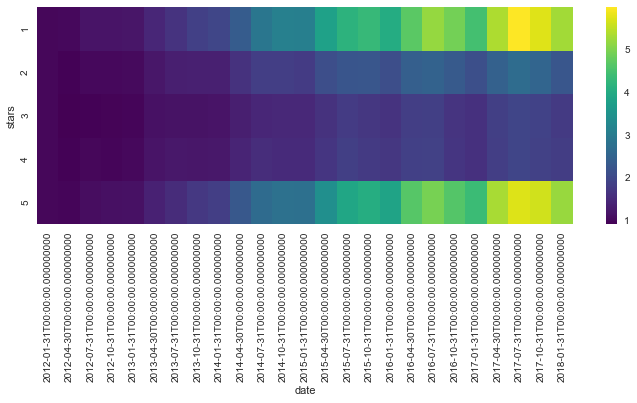

In [217]:
###
# ValueError: Colormap husl is not recognized. Possible values are: Accent, Accent_r, Blues,
#         Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, 
#         GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn,
#         PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu,
#         PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r,
#         RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r,
#         Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r,
#         Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r,
#         YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r,
#         bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r,
#         cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r,
#         gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern,
#         gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, 
#         gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral,
#         nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, 
#         rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, 
#         summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain,
#         terrain_r, viridis, viridis_r, winter, winter_r
###
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax = sns.heatmap(np.transpose(dipole), cmap='viridis')
plt.show()

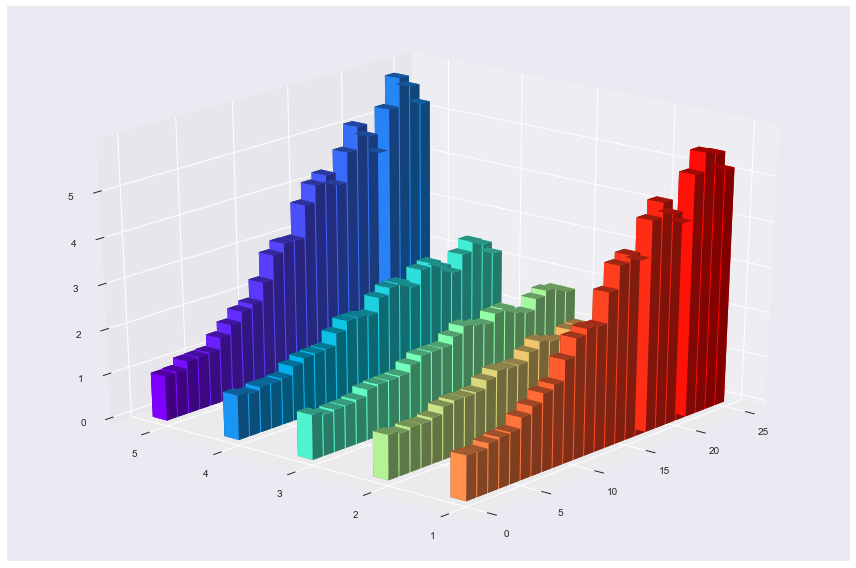

In [225]:
from mpl_toolkits.mplot3d import Axes3D

_x = np.arange(len(dipole.index))
_y = np.flip(np.arange(1, 6), axis=0)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = np.transpose(dipole.as_matrix()).ravel()
bottom = np.zeros_like(top)
# width = depth = 1
dx = 0.9
dy = 0.2

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# ax.bar3d(x, y, bottom, width, depth, top)
ax.view_init(25, 220)

# stretch axis, thanks to stackoverflow.com/q/30223161
# # https://github.com/seth10/life/blob/master/science.py
# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.5, 1, 1]))

colors = cm.rainbow( [1/(len(x)-1)*i for i in range(len(x))] )
ax.bar3d(x, y, bottom, dx, dy, top, colors)
plt.tight_layout()
plt.show()

In [1]:
# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap


#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict

In [229]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [ ]:
f, ax = plt.subplots(1, 1, figsize=(7,7))

#a random point inside vegas
lat = 36.207430
lon = -115.268460
#some adjustments to get the right pic
lon_min, lon_max = lon-0.3,lon+0.5
lat_min, lat_max = lat-0.4,lat+0.5
#subset for vegas
ratings_data_vegas=rating_data[(rating_data["longitude"]>lon_min) &\
                    (rating_data["longitude"]<lon_max) &\
                    (rating_data["latitude"]>lat_min) &\
                    (rating_data["latitude"]<lat_max)]

#Facet scatter plot
ratings_data_vegas.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")
ax1.set_facecolor('black')